# DS 3000 - Assignment 11

**Student Name**: Bella Chin

**Date**: 11/11/2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Question 1: 

Load the dataset “diabetes.csv”, view the dimensions of the data, and gather summary statistics. Comment on your observations about the data.

In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [4]:
# load the data
diabetes_df = pd.read_csv('diabetes.csv')
print(diabetes_df)

# view dimensions
print(diabetes_df.shape)
print(diabetes_df.size)

# gather summary statistics
print(diabetes_df.describe())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

The dataset contains 768 rows and 9 columns, including information about pregnancies, glucose levels, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function, age, and the outcome (whether the person has diabetes). The summary statistics show the following: The average number of pregnancies is 3.85, glucose levels have a mean of 120.89, and blood pressure averages 69.11. Skin thickness has a mean of 20.54, while insulin averages 79.80. The average BMI is 31.99, and the diabetes pedigree function has a mean of 0.47. Age averages 33.24 years. The outcome (diabetes status) has a mean of 0.35, indicating a higher proportion of non-diabetic individuals. The data also highlights wide variability, with some extreme values for glucose, insulin, and BMI.

## Question 2: 
Create two visualizations that demonstrate univariate and/or pairwise patterns in the data. Comment on the patterns.

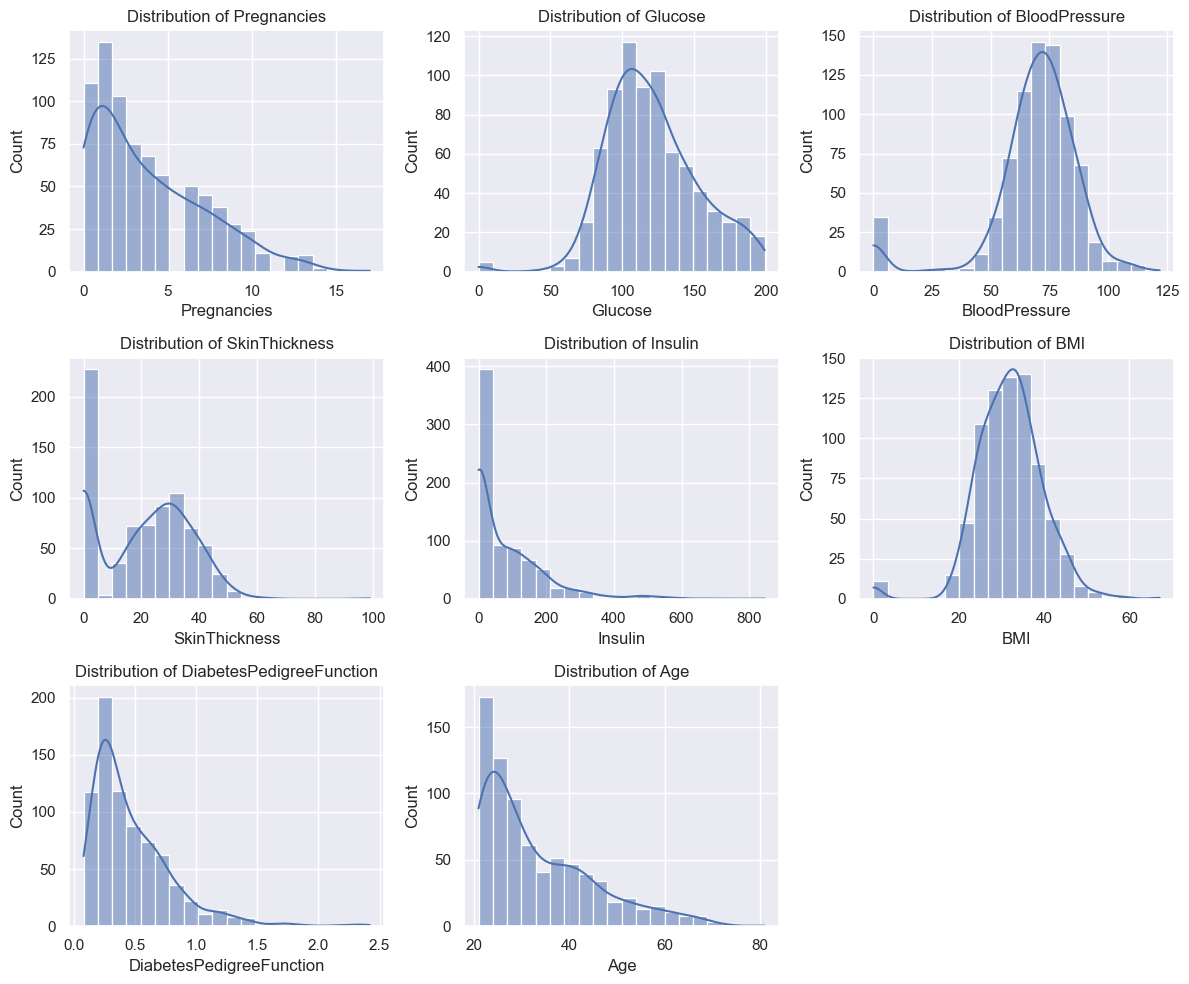

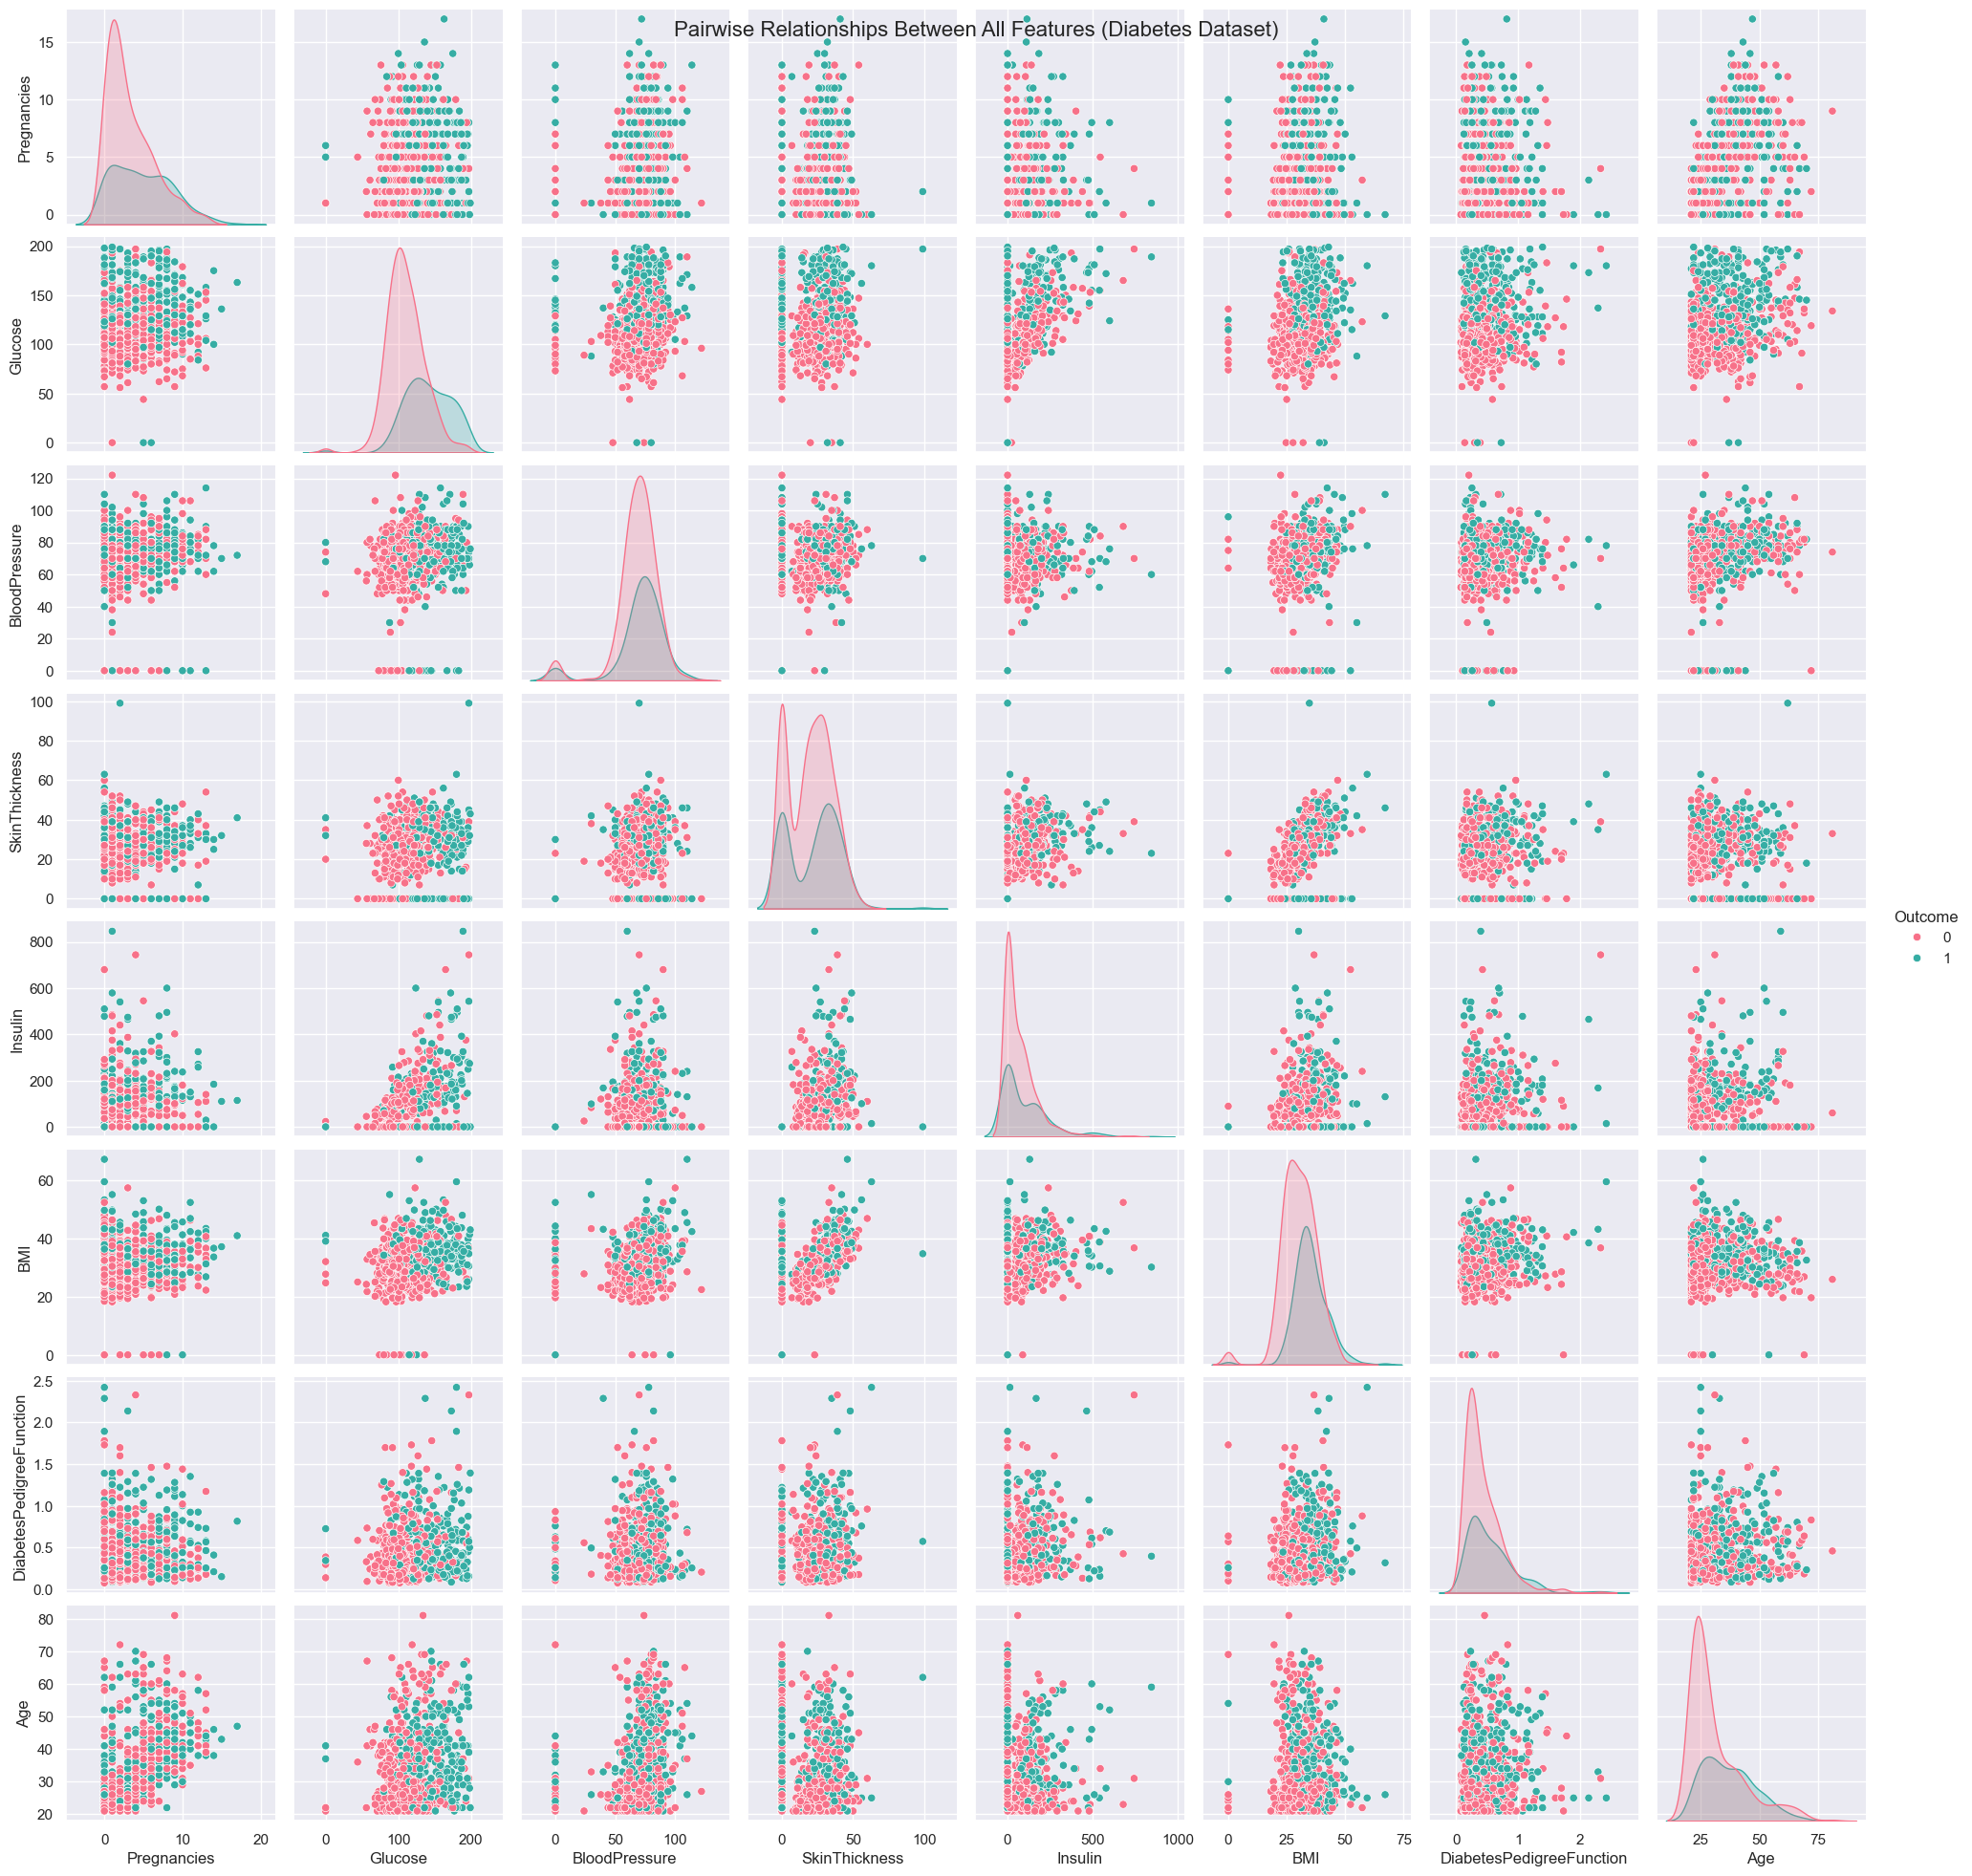

In [7]:
# visualize the distribution
plt.figure(figsize=(12, 10))

for i, column in enumerate(diabetes_df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.histplot(diabetes_df[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# visualize the pairwise relationships btwn the features (tutorialspoint - visualizing pairwise relationship)
sns.pairplot(diabetes_df, hue = 'Outcome', diag_kind = 'kde', kind = 'scatter', palette = 'husl')
plt.suptitle('Pairwise Relationships Between All Features (Diabetes Dataset)', size=16)
plt.show()

The histograms show that most features have right-skewed distributions, particularly pregnancies, skin thickness, insulin, diabetes pedigree function, and age, while glucose, blood pressure, and BMI are closer to normal. The pairplot reveals clustering patterns, suggesting that higher glucose and BMI levels are more associated with the outcome one (likely diabetic). Positive correlations appear between BMI and skin thickness, as well as age and pregnancies, indicating interrelated factors. Features like glucose and insulin show separation between classes, highlighting their potential importance in predicting diabetes.

## Question 3
Evaluate the data for missing or invalid values. Then prepare the data, and ensure that you handle missing and invalid values (if they exist).

In [10]:
# check for missing values
print(diabetes_df.isnull().sum())

# seeing the percentage of missing values in each column
print((diabetes_df.isnull().mean()*100).sort_values(ascending = False))

# seeing how many missing values there can be in a single row at any time
print(diabetes_df.isnull().sum(axis=1).sort_values(ascending=False))

# check the dataset variable types & convert to the suitable types
print('Varible types before converting:\n', diabetes_df.dtypes)

diabetes_df['Outcome'] = diabetes_df['Outcome'].astype('category')

# check the dataset variable types after
print('Varible types after converting:\n', diabetes_df.dtypes)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64
0      0
1      0
506    0
507    0
508    0
      ..
258    0
259    0
260    0
261    0
767    0
Length: 768, dtype: int64
Varible types before converting:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age

The results show that there are no missing values in any of the columns, indicating a complete dataset. Regarding data types, only one change occurred during the conversion process, as most of the columns were already correctly formatted. The variables like Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, and Age are integers, while BMI and DiabetesPedigreeFunction are float. The only change made was converting the Outcome from being an integer to being a categorical variable suitable for classification tasks since it consisted of two different categorical types: 0s and 1s.

## Question 4
Partition the data into train/test sets. After which, perform the following:
encode any categorical data
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

In [13]:
# partition the data
variables = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = diabetes_df[variables]
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,   # the input features
                                                    y,   # the label
                                                    test_size = 0.3,    # set aside 30% of the data as teh test set
                                                    random_state = 7,   # reproduce the results
                                                    stratify = y       # preserve the distribution of the labels
                                                   )

# normalize the numeric features
scaler = StandardScaler()

scaler.fit(X_train[variables])

X_train[variables] = scaler.transform(X_train[variables]) #scale the training data
X_test[variables] = scaler.transform(X_test[variables]) #scale the training data

# view the prepared data
X_train.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
424,1.187727,0.938624,0.461779,0.672316,1.049781,1.388791,0.077408,0.240589
282,0.895556,0.372851,0.983173,-0.389364,0.590239,0.007326,-0.641475,0.327943
747,-0.857470,-1.261605,0.253221,1.234382,-0.228581,1.836123,1.718951,-0.108826
638,0.895556,-0.758696,0.357500,0.672316,0.055500,1.125655,1.082145,-0.108826
621,-0.565299,-0.915855,0.357500,-0.077105,-0.704833,-1.071533,3.422760,-0.458242
392,-0.857470,0.309987,-0.268173,-0.451816,2.762618,-1.137317,-0.282034,-1.069720
468,1.187727,-0.035763,-3.605097,-1.326141,-0.704833,-0.308438,-0.865065,0.415297
42,0.895556,-0.475809,1.191731,-0.202009,-0.704833,-1.268886,-0.717892,1.288836
232,-0.857470,-1.324469,0.566057,0.235154,-0.395687,-0.913651,0.267034,-0.982366
744,2.648581,1.001488,0.983173,0.984575,0.464910,1.086185,1.939710,0.502651


The code splits the diabetes dataset into training and testing sets, using 70% for training and 30% for testing while preserving the target variable distribution (stratify=y). It then standardizes the feature values (such as Pregnancies, Glucose, BloodPressure, etc.) using StandardScaler, which scales the data to have a mean of 0 and a standard deviation of 1. The scaler is fitted on the training data and then used to transform both the training and test data to ensure consistency. This preprocessing prepares the dataset for machine learning models, ensuring better performance and avoiding issues with features on different scales.

## Question 5 
Build the model that predicts the target variable. Ensure that you:
- Instantiate the correct SVM model, train and evaluate it.
- Use GridSearchCV to tune at least two hyperparameters.**
- Perform cross validation.
**You'll need to read the documentation of the SVM algorithm to identify the hyperparameters.
Display: 1) the best model/parameters and 2) the best score that was obtained.

In [16]:
# instantiate the SVM model
svm = SVC() 

# set the grid
params = {'C': [0.1, 1, 3, 5, 10],
          'gamma': [0.1, 1, 3, 5, 10]}

svm_grid = GridSearchCV(svm, params, cv=5)

# train the model
svm_grid.fit(X_train, y_train)

# print the best params and score
print('Best parameters:',svm_grid.best_params_)
print('Best Score from CV: {:.2f}'.format(svm_grid.best_score_))

# scale the new data
X_test[variables] = scaler.transform(X_test[variables]) #scale the test data

# predict the labels for the test set 
y_pred = svm_grid.predict(X_test)

print('The predicted outcome is: {}'.format(y_pred))
print('Accuracy on test data: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Best parameters: {'C': 1, 'gamma': 0.1}
Best Score from CV: 0.76
The predicted outcome is: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
Accuracy on test data: 0.65


## Question 6
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model. Did it accurately predict the target? Do you think the prediction from this model is useful and would you advocate for its use in the medical industry?

The model shows signs of overfitting, with a relatively high training score (0.76) but a low test accuracy (0.35), indicating poor generalization to unseen data. This suggests high variance, as the model performs well on the training set but fails to predict accurately on new data. Given its low accuracy, the model would not be suitable for the medical industry, where reliable predictions are crucial, especially regarding predicting whether someone has diabetes or not. 

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
